# Machine Learning Project - Life Expectancy Data


1. Objective: The main objective of the analysis will be focused on prediction of the average life expectancy.

2. This data set is taken from the  Global Health Observatory (GHO) data repo under World Health Organization (WHO) to keep track of health status and other related factors that could potentially affect the average life expactancy in different countries.

3. Data exploration action taken by plotting the historgram of life expactancy. As can be observed it follows a very good Gaussian distribution. Action taken to data cleaning is using dropna() command to delete rows with incomplete data. Also transformed categorical data using one-hot encodeing.

4. Three models were coded below. #1 - baseline simple linear regression, #2 - Adding polynomial effect, #3 - ridge regression model. All three method used the same train/test splits on the one-hot encoded data.

5. The Mean Squared Error on the test data for #1 is 4.308597, #2 is 8.857000e+06, #3 is 2.07. This shows that the regularization model using ridge regression is the most accurate. This can also be observed throught the plots in each section where it shows pred vs ground truth. THe best alpha for ridge regression is 0.002. 

6. Key findings and insights: Fitting polynomial feature increased error by a huge margin. This can be explained that most of the data here follow a Gaussian distribution instead of having polynomial features as they are sampled over a large population pool. Ridge regression model can predict the average life expectancy within 2 years of error. Therefore using this model, researchers can predict the average life expectancy for a specific country by manipulating the fit data. This provides a way to determine which factor would affect the life expectancy most and guide health care professionals to focus on specific sectors.

7. Next step in analyzing the data could involve in manipulations of the data and explore how specific sector affect life expectancy. Correlations between different columns could also be explored. For example, adult mortality rate could be related to alcohol consumption or Hepatitis B infection rates etc.

#1.Following code produce results of a simple linear regression model as baseline

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Life Expectancy Data.csv').dropna()
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


array([[<AxesSubplot:title={'center':'Life expectancy '}>]], dtype=object)

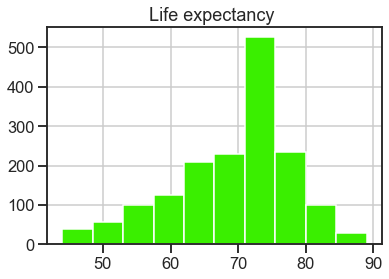

In [57]:
data.hist(column='Life expectancy ')


In [58]:
data.dtypes.value_counts()

float64    16
int64       4
object      2
dtype: int64

In [59]:
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

In [60]:
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

small_num_ohc_cols -= 1

small_num_ohc_cols.sum()

133

In [61]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
data_ohc = data.copy()

le = LabelEncoder()
ohc = OneHotEncoder()
for col in num_ohc_cols.index:

    dat = le.fit_transform(data_ohc[col]).astype(np.int)

    data_ohc = data_ohc.drop(col, axis=1)

    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [62]:
print(data.shape[1])

data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

22
20


In [63]:
from sklearn.model_selection import train_test_split

y_col = 'Life expectancy '

#normal data
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
#one hot encoded data
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

error_df = list()
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))
error_df

[train    2.116658
 test     4.308597
 Name: one-hot enc, dtype: float64]

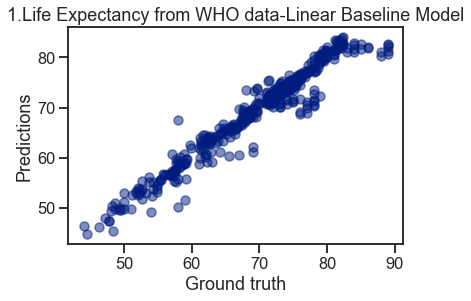

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test_ohc, y_test_ohc_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='1.Life Expectancy from WHO data-Linear Baseline Model');

#2. Following codes add polynomial feature to the baseline linear regression model

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [67]:
data_ohc

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_125,Country_126,Country_127,Country_128,Country_129,Country_130,Country_131,Country_132,Status_0,Status_1
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [68]:
degree= 3
pf=PolynomialFeatures(degree)
lr=LinearRegression()
X_poly_ohc_train=pf.fit_transform(X_train_ohc)
X_poly_ohc_test=pf.fit_transform(X_test_ohc)

In [69]:
error_df = list()
LR = LR.fit(X_poly_ohc_train, y_train_ohc)
y_train_ohc_pred = LR.predict(X_poly_ohc_train)
y_test_ohc_pred = LR.predict(X_poly_ohc_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))
error_df

[train    4.962762e+01
 test     8.857000e+06
 Name: one-hot enc, dtype: float64]

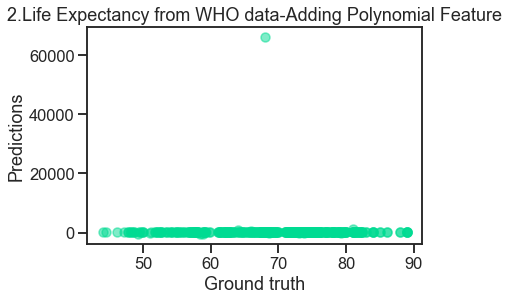

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('winter_r')

ax = plt.axes()

ax.scatter(y_test_ohc, y_test_ohc_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='2.Life Expectancy from WHO data-Adding Polynomial Feature');

#3. Following Code uses Ridge regularization regression method

In [71]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [72]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.linear_model import RidgeCV
alphas = [0, 0.002, 0.004, 0.006, 0.01, 0.02, 0.05, 0.1, 0.5, 1, 5]
ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train_ohc, y_train_ohc)

ridgeCV_rmse = rmse(y_test_ohc, ridgeCV.predict(X_test_ohc))

#print mean squared error
print(ridgeCV.alpha_, ridgeCV_rmse)

0.002 2.075982582585693


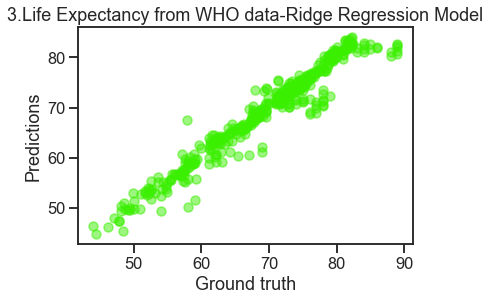

In [73]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('prism')

ax = plt.axes()

ax.scatter(y_test_ohc, ridgeCV.predict(X_test_ohc), alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='3.Life Expectancy from WHO data-Ridge Regression Model');